In [7]:
from b2heavy.TwoPointFunctions.utils     import correlation_diagnostics
from b2heavy.TwoPointFunctions.types2pts import CorrelatorIO, plot_effective_coeffs
from b2heavy.TwoPointFunctions.fitter    import StagFitter

import numpy             as np
import gvar              as gv
import matplotlib.pyplot as plt

In the following section, we set all the parameter for the analysis

In [32]:
# Correlator specifics
ENSEMBLE = 'Fine-Phys'
MESON    = 'D'
MOMENTUM = '400'

DATA_DIR = '/Users/pietro/code/data_analysis/BtoD/Alex/'

BINSIZE  = 16
SMSLIST  = ['1S-1S','d-d','d-1S']

# Correlation matrix specifics
DIAG   = False
BLOCK  = False
SCALE  = True
SHRINK = True
SVD    = 1e-12

# Specifics of the analysis
TRANGE_EFF = (11,19) 
TRANGE     = (5,21)
NSTATES    = 3
WPRIORS    = True
JKFIT      = False

In the following cell, we initialize the objects of `b2heavy` that read the data and format them

In [33]:
io   = CorrelatorIO(ENSEMBLE,MESON,MOMENTUM,PathToDataDir=DATA_DIR)
stag = StagFitter(
    io       = io,
    jkBin    = BINSIZE,
    smearing = SMSLIST
)

We also initialize the instruction to build the covariance matrix

In [34]:
cov_specs = dict(
    diag   = DIAG  ,
    block  = BLOCK ,
    scale  = SCALE ,
    shrink = SHRINK,
    cutsvd = SVD   
)

In the following, we calculate and plot effective mass

In [35]:
effm,effa = stag.meff(TRANGE_EFF,verbose=True,**cov_specs)

Least Square Fit:
  chi2/dof [dof] = 5.2 [27]    Q = 1.7e-17    logGBF = 65.676

Parameters:
          const   0.86945 (70)      [ 0.8663 (77) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10*,1e-10)    (itns/time = 2/0.0)
  fitter = scipy_least_squares    method = trf

Least Square Fit:
  chi2/dof [dof] = 3.1 [27]    Q = 7.3e-08    logGBF = 130.81

Parameters:
('1S-1S', 'Unpol')     1.7285 (84)      [   1.769 (33) ]  *
 ('d-1S', 'Unpol')    0.22106 (58)      [  0.2245 (66) ]  
  ('d-d', 'Unpol')   0.028677 (55)      [ 0.02889 (66) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08*,1e-10,1e-10)    (itns/time = 3/0.0)
  fitter = scipy_least_squares    method = trf



/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in sqrt
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )
/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in log
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )
/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in arccosh
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )


/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in sqrt
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )
/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in log
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )
/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in arccosh
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )


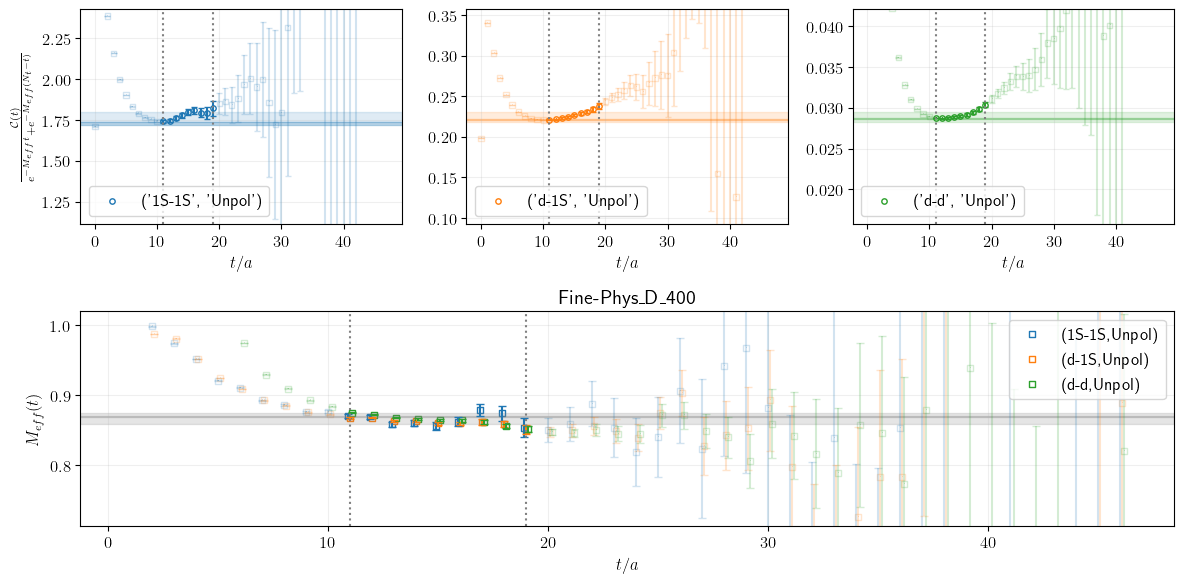

In [36]:
toplot = stag.meff(TRANGE_EFF,**cov_specs,plottable=True)

plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 12

plt.figure(figsize=(12, 6 if len(stag.keys)/len(SMSLIST)==1 else 8))
plot_effective_coeffs(TRANGE_EFF,Aknob=20,*toplot)

plt.title(f'{ENSEMBLE}_{MESON}_{MOMENTUM}')

plt.tight_layout()

plt.show()


Here we set priors

In [13]:
priors = stag.priors(NSTATES,Meff=effm,Aeff=effa)
priors

{'E': [1.19(13), -1.29(54), -0.8(1.0), -0.8(1.0), -0.8(1.0), -0.8(1.0)],
 'Z_1S_Unpol': [0.55(19), -1.2(1.2), 0.5(1.5), 0.5(1.5), 0.5(3.0), 0.5(3.0)],
 'Z_d-1S_Unpol': [0.5(1.7), 0.5(1.7), 0.5(1.7), 0.5(1.7)],
 'Z_d_Unpol': [-1.26(14), -2.5(1.5), 0.5(1.5), 0.5(1.5), 0.5(3.0), 0.5(3.0)]}

Now we perform the fit

In [14]:
fit = stag.fit(
    Nstates = NSTATES,
    trange  = TRANGE,
    priors  = priors,
    verbose = True,
    **cov_specs
)

---------- 3+3 fit in (5, 21) for mes: D of ens: MediumCoarse for mom: 000 --------------
Least Square Fit:
  chi2/dof [dof] = 0.6 [51]    Q = 0.99    logGBF = 979.31

Parameters:
            E 0   1.1830 (31)     [  1.19 (13) ]  
              1    -1.88 (28)     [ -1.29 (54) ]  *
              2    -1.36 (58)     [ -0.8 (1.0) ]  
              3    -0.88 (78)     [ -0.8 (1.0) ]  
              4    -0.38 (15)     [ -0.8 (1.0) ]  
              5    -0.89 (94)     [ -0.8 (1.0) ]  
   Z_1S_Unpol 0    0.525 (26)     [  0.55 (19) ]  
              1    -0.60 (24)     [ -1.2 (1.2) ]  
              2     0.74 (10)     [  0.5 (1.5) ]  
              3     0.74 (95)     [  0.5 (1.5) ]  
              4     0.3 (2.7)     [  0.5 (3.0) ]  
              5     1.6 (1.8)     [  0.5 (3.0) ]  
 Z_d-1S_Unpol 0    0.351 (74)     [  0.5 (1.7) ]  
              1     0.36 (42)     [  0.5 (1.7) ]  
              2     0.72 (24)     [  0.5 (1.7) ]  
              3     0.63 (64)     [  0.5 (1.7) ]  
   

In [15]:
fitres = stag.fit_result(
    NSTATES,
    TRANGE,
    verbose = True,
    priors  = priors if WPRIORS else None
)

# ---------- 3+3 fit in (5, 21) for mes: D of ens: MediumCoarse for mom: 000 --------------
Least Square Fit:
  chi2/dof [dof] = 0.6 [51]    Q = 0.99    logGBF = 979.31

Parameters:
            E 0   1.1830 (31)     [  1.19 (13) ]  
              1    -1.88 (28)     [ -1.29 (54) ]  *
              2    -1.36 (58)     [ -0.8 (1.0) ]  
              3    -0.88 (78)     [ -0.8 (1.0) ]  
              4    -0.38 (15)     [ -0.8 (1.0) ]  
              5    -0.89 (94)     [ -0.8 (1.0) ]  
   Z_1S_Unpol 0    0.525 (26)     [  0.55 (19) ]  
              1    -0.60 (24)     [ -1.2 (1.2) ]  
              2     0.74 (10)     [  0.5 (1.5) ]  
              3     0.74 (95)     [  0.5 (1.5) ]  
              4     0.3 (2.7)     [  0.5 (3.0) ]  
              5     1.6 (1.8)     [  0.5 (3.0) ]  
 Z_d-1S_Unpol 0    0.351 (74)     [  0.5 (1.7) ]  
              1     0.36 (42)     [  0.5 (1.7) ]  
              2     0.72 (24)     [  0.5 (1.7) ]  
              3     0.63 (64)     [  0.5 (1.7) ]  
 

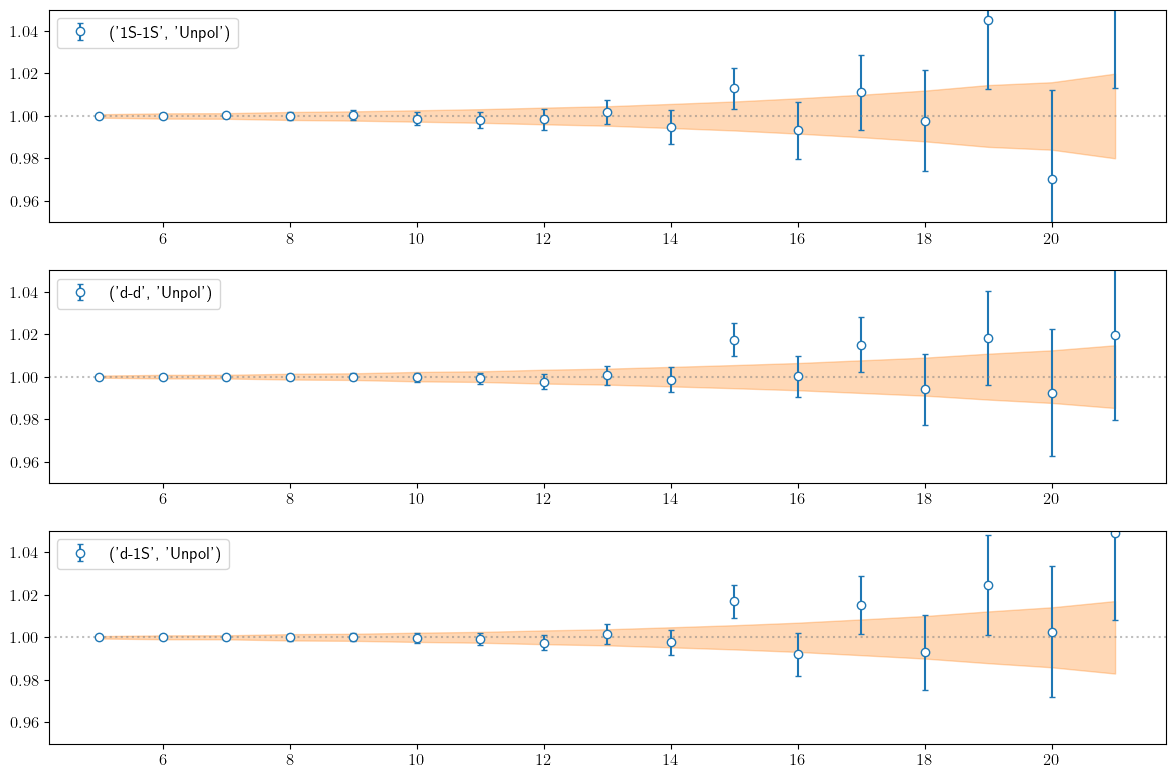

In [16]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 12

npol = len(stag.keys)//len(SMSLIST)
f, ax = plt.subplots(3,npol,figsize=(12,8))
stag.plot_fit(ax,NSTATES,TRANGE)

plt.tight_layout()